In [1]:
import numpy as np
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table

#mendefinisikan nilai fungsi dari contoh
def f(x):
    return(2*x-8)

K=1 #koefisien pannas
xm=10 #panjang pipa besi terisolasi sempurna
A=-8 #suhu di x_0
B=48 #suhu di xm
deltat=0.3 #selisih waktu
tn=100 #batas waktu pada t_n
m=10 #banyak pemotongan pada tali
deltax=xm/m #selisih antar posisi
lamda=(K*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.5:
    print('Metode stabil, sebab λ =', lamda, '≤ 0.5')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan matriks nol U berukuran (tn+1)x(m+1)
U=zeros((tn+1,m+1))

#mengisi syarat awal ke baris pertama matriks U
for i in range (m+1):
    
    U[1][i]=f(i)

#mengisi syarat batas
#ke kolom pertama dan kolom ke-(m+1) matriks U
for k in range (tn):
    for i in range (m-1):
        
        ii=i+2
        U[k+1][0]=A
    
    U[k+1][ii]=B

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for k in range (tn):
    for i in range (m-1):
                
        ii=i+1
        U[k+1][ii]=lamda*U[k][ii-1]+(1-2*lamda)*U[k][ii]+lamda*U[k][ii+1]

#membuat keluaran berupa tabel nilai pendekatan
print('Tabel nilai pendekatan suhu di x = 0 sampai x =',m)
DataFrame(U)

Metode stabil, sebab λ = 0.3 ≤ 0.5
Tabel nilai pendekatan suhu di x = 0 sampai x = 10


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.0
2,-8.0,-2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.400000,48.0
3,-8.0,-3.360000,-0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,4.320000,20.160000,48.0
4,-8.0,-3.960000,-1.296000,-0.216000,0.000000,0.000000,0.000000,1.296000,7.776000,23.760000,48.0
...,...,...,...,...,...,...,...,...,...,...,...
96,-8.0,-2.859735,2.325505,7.596302,12.984881,18.511955,24.184688,29.995990,35.925193,41.940072,48.0
97,-8.0,-2.846242,2.351172,7.631637,13.026430,18.555653,24.226259,30.031360,35.950896,41.953587,48.0
98,-8.0,-2.833145,2.376087,7.665935,13.066759,18.598068,24.266607,30.065691,35.975842,41.966703,48.0
99,-8.0,-2.820432,2.400272,7.699228,13.105904,18.639237,24.305770,30.099011,36.000055,41.979434,48.0


In [2]:
#mengambil package yang diperlukan untuk membuat animasi
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Animasi Proses Perubahan Suhu pada Pipa Besi yang Terisolasi Sempurna


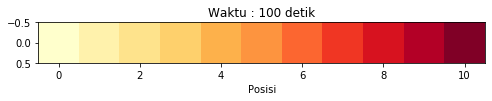

In [3]:
#mengatur posisi kanvas untuk membuat gambar per frame
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()
print('Animasi Proses Perubahan Suhu pada Pipa Besi yang Terisolasi Sempurna')
ax.set_xlabel('Posisi')

#mengatur posisi awal matriks yang akan digambar pada kanvas
nx = 1
ny = m-1

line2d, = ax.plot([], [], lw=2)

#mendefinisikan animasi (dalam m+1 frame)
def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Waktu : '+str(i)+' detik')    
    ax.imshow([U[i]], cmap='YlOrRd')
    return (line2d,)

#membuat keluaran berupa animasi
anim = animation.FuncAnimation(fig, animate, frames=tn+1, interval=100, blit=True)
HTML(anim.to_html5_video())

Animasi Proses Difusi pada Zat Penampang pada Dimensi Satu


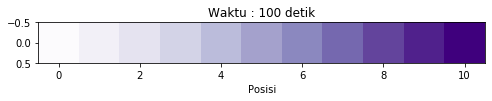

In [4]:
#mengatur posisi kanvas untuk membuat gambar per frame
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()
print('Animasi Proses Difusi pada Zat Penampang pada Dimensi Satu')
ax.set_xlabel('Posisi')

#mengatur posisi awal matriks yang akan digambar pada kanvas
nx = 1
ny = m-1

line2d, = ax.plot([], [], lw=2)

#mendefinisikan animasi (dalam m+1 frame)
def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Waktu : '+str(i)+' detik')    
    ax.imshow([U[i]], cmap='Purples')
    return (line2d,)

#membuat keluaran berupa animasi
anim = animation.FuncAnimation(fig, animate, frames=tn+1, interval=100, blit=True)
HTML(anim.to_html5_video())